### 출처 : 상점 신용카드 매출 예측 경진대회
- 문제 제공자: FUNDA(데이콘)
- 소상공인 가맹점 신용카드 빅데이터와 AI로 매츨 예측 분석
- 문제 개요: 2019년 2월 28일까지의 카드 거래 데이터를 이용하여 2019년 3월 1일 ~ 5월 31일까지의 상점별 3개월 총 매출 예측

## 사용 데이터
### funda_train_csv: 모델 학습용 데이터
- store_id : 상점의 고유 id
- card_id : 사용한 카드의 고유 아이디 // card_company : 비식별화된 카드 회사
- transcated_date : 거래 날짜 // transcated_time : 거래 시간
- installment_term : 할부 개월 수
- region : 상점 지역 // type_of_business : 상점 업종
- amount : 거래액
### submission.csv : 모델 적용 데이터
- store_id : 상점의 고유 id

### 문제의 핵심 : 특징 및 라벨 추출을 위한 데이터 요약
- 제공된 데이터의 레코드의 단위는 거래이며, 예측하고자 하는 레코드의 단위는 3개월 간의 **상점 매출**임
- Y : store_id별 2019년 3월 1일 ~ 5월 31일의 매출 합계

## 학습 데이터 구축

#### 시점 변수 생성
1. 기존 시간 변수(transacted_date)에서 연도(transacted_year)와 월(transacted_month)을 추출
2. 시점 변수 생성 : 시점(t) = (연도-2016)*12 + 월
3. 불필요한 변수 제거
    - transacted_year
    - transacted_month
    - transacted_date
    - transacted_time

#### 범주 변수 탐색
1. card_id, card_company는 특징으로 사용하기에는 도메인 지식 하에서 부적절하다고 판단하여 삭제
2. 업종(type_of_business), 지역(region), 할부 거래(installment_term)에 대한 value_counts 수행
  - 상태 공간이 매우 큰 범주 변수임을 확인하여, 더미화하기에는 부적절하다고 판단
  - 업종 및 지역에 따른 상점 매출 합계의 평균을 사용하기로 결정
  - 할부 값은 할부 거래인지 여부만 나타내도록 이진화
  - 이 과정에서 결측은 제거하지 않고 없음이라고 변환

### 학습 데이터 구조 작성
- 기존에 정리되지 않은 데이터를 바탕으로 학습 데이터를 생성해야 하는 경우에는 레코드의 단위를 고려하여 학습 데이터의 구조를 먼저 작성 하는 것이 바람직함
- funda_train.csv(이하 train_df)에서 store_id, region, type_of_business, t를 기준으로 중복을 제거한 뒤, 해당 컬럼만 갖는 데이터프레임으로 학습 데이터(train_df)를 초기화함

### 평균 할부율 부착
1. installment_term_per_store 생성
  - store_id에 따른 installment_term의 평균을 groupby를 이용하여 생성: installment_term_per_store
2. installment_term_per_store를 사전화 : installment_term_per_store.to_dict()
3. train_df의 store_id를 replace하는 방식으로 평균 할부율 변수 생성

### 기존 데이터 부착 테크닉
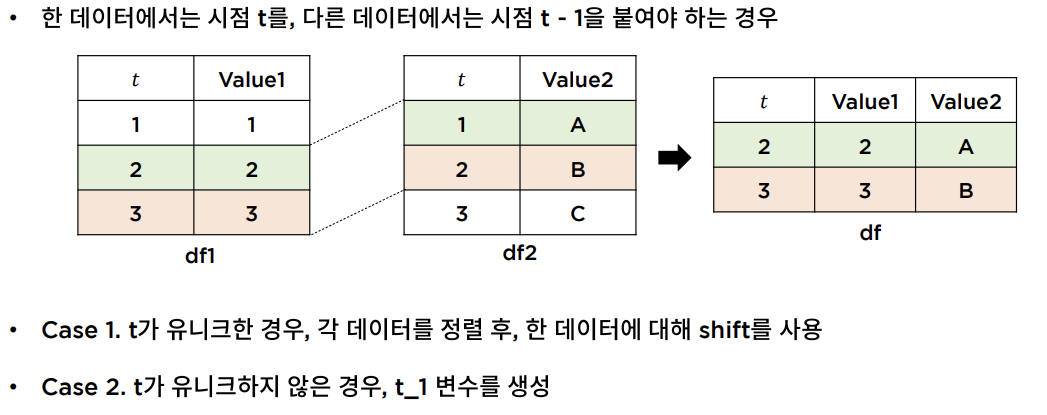

## Case1
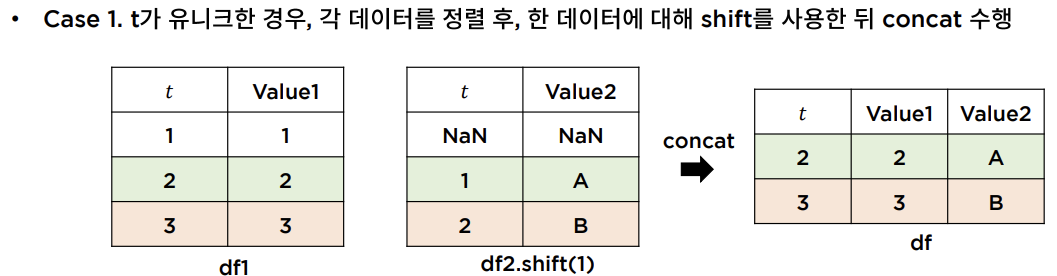

## Case2
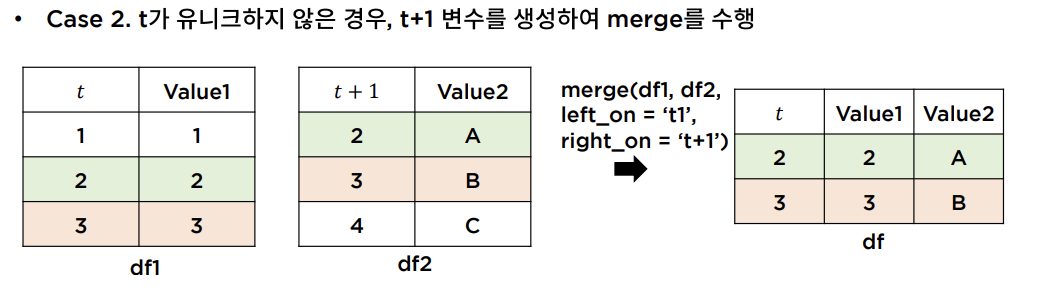

### 기존 매출 합계 부착
1. store_id와 t에 따른 amount의 합계 계산 : amount_sum_per_t_and_sid
2. 다음 과정을 k = 1, 2, 3에 대해 반복
    1. amount_sum_per_t_and_sid에 **t_k** 변수 생성(t_k = t+k)
    2. train_df와 amount_sum_per_t_and_sid 병합 (단, amount_sum_per_t_and_sid에는 t 컬럼 삭제)
    3. 병합 후 train_df의 amount 변수명을 k_before_amount로 변경
    4. 불필요한 변수가 추가되는 것을 막기 위해, amount_sum_per_t_and_sid와 train_df에 t_k 변수 삭제

### 기존 지역별 매출 합계 부착
1. store_id를 키로 하고, region을 value로 하는 사전 생성
2. amount_sum_per_t_and_sid에서 region 변수 생성 및 region과 t에 따른 amount 평균 계산: amount_sum_per_t_and_region
3. 다음 과정을 k = 1, 2, 3에 대해 반복
    1. amount_sum_per_t_and_region에 **t_k** 변수 생성(t_k = t+k)
    2. train_df와 amount_sum_per_t_and_region 병합 (단, amount_sum_per_t_and_region에는 t 컬럼 삭제)
    3. 병합 후 train_df의 amount 변수명을 k_before_amount_of_region으로 변경
    4. 불필요한 변수가 추가되는 것을 막기 위해, amount_sum_per_t_and_sid와 train_df에 t_k 변수 삭제

### 기존 업종별 매출 합계 부착
1. store_id를 키로 하고, type_of_business를 value로 하는 사전 생성
2. amount_sum_per_t_and_sid에서 type_of_business 변수 생성 및 type_of_business와 t에 따른 amount 평균 계산: amount_mean_per_t_and_type_of_business
3. 다음 과정을 k = 1, 2, 3에 대해 반복
    1. amount_sum_per_t_and_type_of_business에 **t_k** 변수 생성(t_k = t+k)
    2. train_df와 amount_sum_per_t_and_type_of_business 병합 (단, type_of_business에는 t 컬럼 삭제)
    3. 병합 후 train_df의 amount 변수명을 k_before_amount_of_region으로 변경
    4. 불필요한 변수가 추가되는 것을 막기 위해, type_of_business와 train_df에 t_k 변수 삭제

### 라벨 부착하기
1. 다음 과정을 k = 1,2,3에 대해 반복
    1. amount_sum_per_t_and_sid에 t_k (t_k = t-k)변수 생성
    2. train_df와 amount_sum_per_t_and_sid를 병합
    3. 병합 후, train_df의 amount 변수명을 Y_k로 변경
2. 라벨 생성: Y = Y_1 + Y_2 + Y_3

# 기초 탐색 및 데이터 준비

### 학습 데이터 불러오기

In [1]:
import os
import pandas as pd
os.chdir(r'C:\Users\신상훈\Desktop\preprocessing\part-6.-실전-머신러닝-프로젝트\6. 실전 머신러닝 프로젝트\23. 상점 신용카드 매출 예측\데이터')

In [2]:
# df의 시간 범위: 2016-06-01 ~ 2019-02-28
df = pd.read_csv('funda_train.csv')
df.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000


In [3]:
# submission_df의 범위: 2019-03-01 ~ 2019-05-31
submission_df = pd.read_csv('submission.csv')
submission_df.head()

,store_id,amount
0,0,0
1,1,0
2,2,0
3,4,0
4,5,0


In [4]:
df.shape

(6556613, 9)

#### 변수 목록 탐색

In [5]:
# 상점 ID는 일치
print(df['store_id'].unique())
print(submission_df['store_id'].unique())

[   0    1    2 ... 2134 2135 2136]
[   0    1    2 ... 2134 2135 2136]


In [6]:
print(df.columns)
print(submission_df.columns)

# 일치하는 컬럼이 store_id와 amount 밖에 없으므로, 새로운 특징을 추출하는 것이 바람직함

Index(['store_id', 'card_id', 'card_company', 'transacted_date',
       'transacted_time', 'installment_term', 'region', 'type_of_business',
       'amount'],
      dtype='object')
Index(['store_id', 'amount'], dtype='object')


- 예측 대상은 3개월 합계이고, 가지고 있는 데이터는 분단위로 정리되어 있음
- t-2, t-1, t월의 데이터로 t + 1, t + 2, t + 3월의 매출 합계를 예측하는 것으로 문제를 정의
- 따라서 거래 내역을 요약하여 월별로 데이터를 새로 정의하는 것이 중요

## 학습 데이터 구축

### 년/월 추출

In [10]:
df['transacted_year'] = df['transacted_date'].str.split('-',expand = True).iloc[:,0].astype(int)
df['transacted_month'] = df['transacted_date'].str.split('-',expand = True).iloc[:,1].astype(int)
df.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,transacted_year,transacted_month
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857,2016,6
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857,2016,6
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000,2016,6
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857,2016,6
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000,2016,6


In [11]:
# 데이터 병합을 위한 새로운 컬럼 생성 및 기존 시간 변수 삭제
df['t'] = (df['transacted_year'] - 2016)*12 + df['transacted_month']
df.drop(['transacted_year','transacted_month','transacted_date','transacted_time'], axis = 1, inplace = True)

#### 불필요한 변수 제거
- card_id, card_company는 특징으로 사용하기에는 너무 세분화될 수 있을 뿐만 아니라, 특징으로 유효할 가능성이 없다고 판단하여 삭제

In [12]:
df.drop(['card_id','card_company'],axis= 1, inplace = True)

#### 업종 특성, 지역, 할부 평균 탐색

In [13]:
df['installment_term'].value_counts().head() # 대부분이 일시불이므로, installment_term 변수를 할부인지 아닌지를 여부로 변환

0    6327632
3     134709
2      42101
5      23751
6      10792
Name: installment_term, dtype: int64

In [14]:
df['installment_term'] = (df['installment_term'] > 0).astype(int)
df['installment_term'].value_counts()

0    6327632
1     228981
Name: installment_term, dtype: int64